# Predict the Cost of Homes in California Using Numpy + Pandas in Jupyter

This notebook trains a machine learning model that predicts home costs in California.

The overall objective is to predict the value of home prices using **9 feature variables and 1 target variable:** 

#### **Feature Variables** ####

1.  **longitude:** A measure of how far west a house is (a higher value is farther west)
2.  **latitude:** A measure of how far north a house is (a higher value is farther north)
3.  **housingMedianAge:** Median age of a house within a block (a lower number is a newer building)
4.  **totalRooms:** Total number of rooms within a block
5.  **totalBedrooms:** Total number of bedrooms within a block
6.  **population:** Total number of people residing within a block
7.  **households:** Total number of households, a group of people residing within a home unit, for a block
8.  **medianIncome:** Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9.  **oceanProximity:** Location of the house in proximity to the ocean

#### **Target Variable** ####
1.  **medianHouseValue:** Median house value for households within a block (measured in US Dollars)

## Background

## Scikit-learn

Scikit-learn is a machine learning library for the Python programming language. It features various classification, regression and clustering learning algorithms. 

## Dependencies

- pandas - To work with solid data-structures, n-dimensional matrices and perform exploratory data analysis.
- matplotlib - To visualize data using 2D plots.
- seaborn - To make 2D plots look pretty and readable.
- scikit-learn - To create machine learning models easily and make predictions.
- numpy - To work with arrays.

**A few things to note:**

- You'll need to install the various libraries before importing them ```(i.e. %pip install pandas)```
- You may need to restart the kernel to use updated packages.

# Obtain & Load Data

In [2]:
import pandas as pd
import seaborn as sns 

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [3]:
# Read in the data with read_csv() into a Pandas Dataframe
housing_df = pd.read_csv('housing.csv')

# Use .info() to show the features (i.e. columns) in your dataset along with a count and datatype
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Use .shape to understand how many observations (ie rows/records) of the dataset
# The shape of a DataFrame is a tuple of array dimensions that tells the number of rows and columns of a given DataFrame.
# (row count, column count)
housing_df.shape

(20640, 10)

In [5]:
# Using .head() function to view the first few observations (i.e. rows/records) of the dataset 
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# Using .tail() function to view the last few observations (i.e. records) of the dataset 
housing_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [7]:
# Use .describe() to see metrics about the dataset (count, mean, std, min, 25%, 50%, 75%, max)
# Count is the count of non-null observations (i.e. rows)
# Mean is the average of values for the given column
# Std is standard deviation - how far off from the mean the values are
# Min is the minimum amount of the value
# 25% is the 25th percentile 
# 50% is the 50th percentile
# 75% is the 75th percentile
# max is the maximum amount of the value
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Prepare & Preprocess Data

### Understand missing data that could skew the model

In [8]:
# Verify which features have missing values
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
# Calculate the % of missing data
housing_df['total_bedrooms'].isnull().sum()/housing_df.shape[0] * 100

1.002906976744186

### Use imputation to handle missing data

In [10]:
from sklearn.impute import KNNImputer

# create a temporary copy of the dataset
housing_df_temp = housing_df.copy()

# retrieve columns with numerical data; will exclude the ocean_proximity column since the datatype is object; other columns are float64
columns_list = [col for col in housing_df_temp.columns if housing_df_temp[col].dtype != 'object']

# extract columns that contain at least one missing value
new_column_list = [col for col in housing_df_temp.loc[:, housing_df_temp.isnull().any()]]

# update temp dataframe with numeric columns that have empty values
housing_df_temp = housing_df_temp[new_column_list]

### Impute missing data using machine learning

In [11]:
# initialize KNNImputer to impute missing data using machine learning
knn = KNNImputer(n_neighbors = 3)

# fit function trains the model 
knn.fit(housing_df_temp)

# transform the data using the model
# applies the transformation model (ie knn) to data
array_Values = knn.transform(housing_df_temp)

# convert the array values to a dataframe with the appropriate column names
housing_df_temp = pd.DataFrame(array_Values, columns = new_column_list)

In [12]:
# confirm there are no columns with missing values
housing_df_temp.isnull().sum()

total_bedrooms    0
dtype: int64

In [13]:
# overlay the imputed column over the old column with missing values

# loop through the list of columns and overlay each one
for column_name in new_column_list:
    housing_df[column_name] = housing_df_temp.replace(housing_df[column_name],housing_df[column_name])

# confirm columns no longer contain null data
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Use visualizations to understand the relationship of the target variable with other features

#### Histograms

In [14]:
# Plot the distribution of the target variable (median_house_value) using a histogram

# bins->amount of columns
plt.hist(housing_df['median_house_value'], bins=80)
plt.xlabel("House Values")


# We can see from the plot that the values of Median House Value are distributed normally with few outliers. 
# Most of the house are around 100,000-200,000 range

Text(0.5, 0, 'House Values')

In [15]:
# let's do histograms for the all the features to understand the data distributions
# using housing_df as to not plot the encoded values for OCEAN_PROXIMITY 
housing_df.hist(bins=50, figsize=(20,15))

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

#### Use a heatmap to show correlation

In [16]:
# Plot a graphical correlation matrix for each pair of columns in the dataframe
corr = housing_df.corr(numeric_only=True) # data frame correlation function
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069260 -0.066658           -0.318998     0.927253   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069260    0.099773    0.055310      -0.015176   
latitude                 -0.066658   -0.108785   -0.071035      -0.079809   
housing_

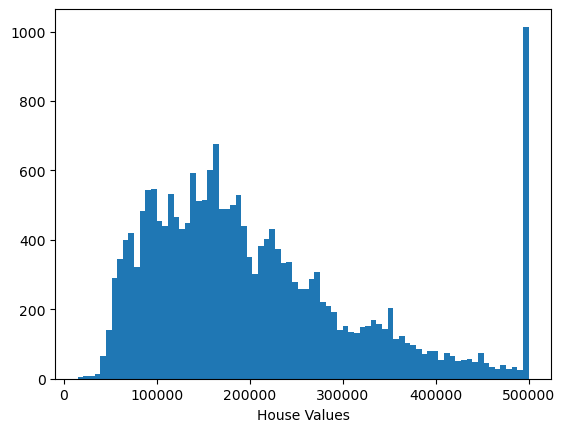

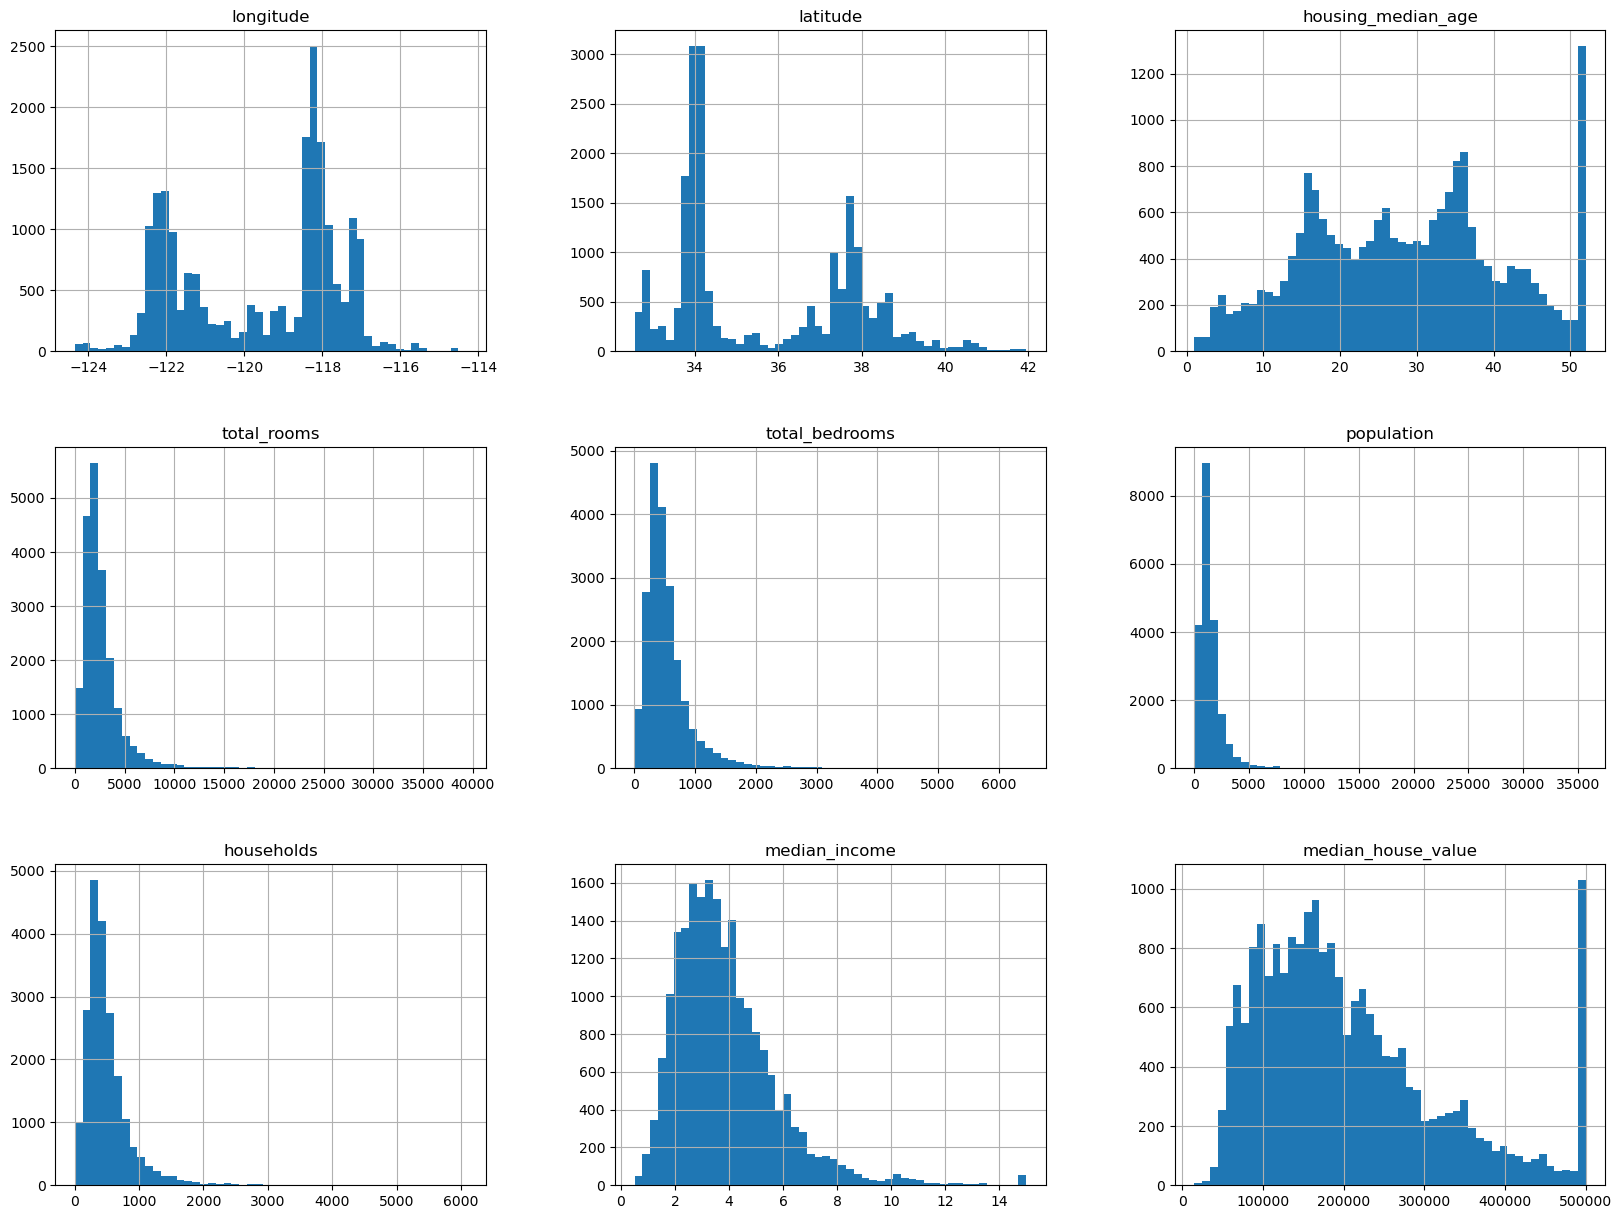

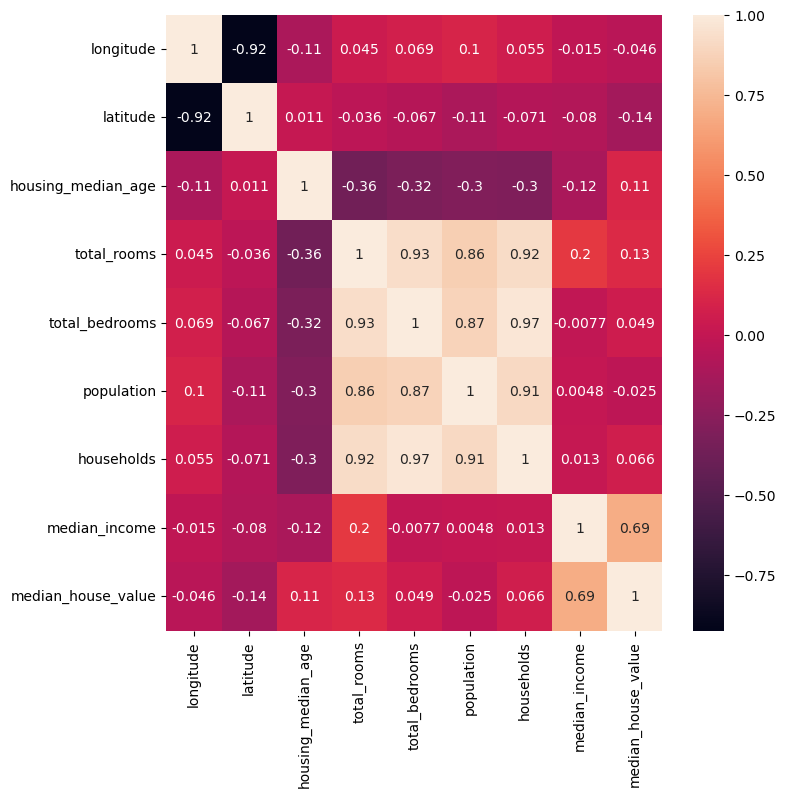

In [17]:
# make the heatmap larger in size
plt.figure(figsize = (8,8))

sns.heatmap(corr, annot=True)
plt.show()

##### Feature Engineering

In [18]:
# Additionally we noted that several features (total_rooms,total_bedrooms,population,households) have very high correlation to one another, 
# so it's interesting to find out if a removal of a few of them would have any affect on the model performance

#  a new feature that is a ratio of the total rooms to households
housing_df['rooms_per_household'] = housing_df['total_rooms']/housing_df['households']

# a new feature that is a ratio of the total bedrooms to the total rooms 
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms']/housing_df['total_rooms']

# a new feature that is a ratio of the population to the households 
housing_df['population_per_household']= housing_df['population']/housing_df['households']

# let's combine the latitude and longitude into 1
housing_df['coords'] = housing_df['longitude']/housing_df['latitude']

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coords                    20640 non-null  float64
dtypes: flo

In [19]:
# remove total_rooms, households, total bedrooms, popluation, longitude, latitude
housing_df = housing_df.drop('total_rooms', axis=1)
housing_df = housing_df.drop('households', axis=1)
housing_df = housing_df.drop('total_bedrooms', axis=1)
housing_df = housing_df.drop('population', axis=1)
housing_df = housing_df.drop('longitude', axis=1)
housing_df = housing_df.drop('latitude', axis=1)

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_room         20640 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coords                    20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


##### Heatmap after removing correlation

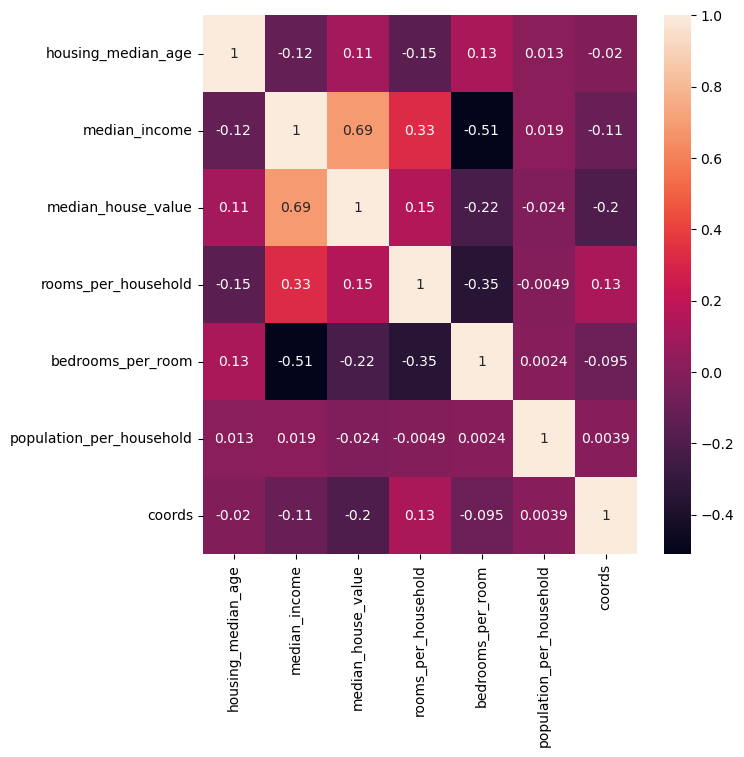

In [20]:
corr = housing_df.corr(numeric_only=True) 

#make the heatmap larger in size
plt.figure(figsize = (7,7))

sns.heatmap(corr, annot=True)
plt.show()

## Encode categorical data

In [21]:
# Most ML algorithms can only learn from numeric data (it's all Math) so categorical data must be encoded (i.e. converted) to numeric data

# Let's review our data types again; showing that ocean_proximity is the only categorical data
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_room         20640 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coords                    20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


In [22]:
# let's see the unique categories for OCEAN_PROXIMITY
housing_df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [23]:
# let's count
housing_df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

### One-Hot Encoding

In [24]:
# Let's see how the Panda's get_dummies() function works
print(pd.get_dummies(housing_df['ocean_proximity']))

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          False   False   False      True       False
1          False   False   False      True       False
2          False   False   False      True       False
3          False   False   False      True       False
4          False   False   False      True       False
...          ...     ...     ...       ...         ...
20635      False    True   False     False       False
20636      False    True   False     False       False
20637      False    True   False     False       False
20638      False    True   False     False       False
20639      False    True   False     False       False

[20640 rows x 5 columns]


In [25]:
# let's replace the OCEAN_PROXIMITY column using get_dummies()
housing_df_encoded = pd.get_dummies(data=housing_df, columns=['ocean_proximity'])

# print the first few observations; notice the old OCEAN_PROXIMITY column is gone
housing_df_encoded.head()

,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,coords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,-3.226769,False,False,False,True,False
1,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,-3.228209,False,False,False,True,False
2,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,-3.229590,False,False,False,True,False
3,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,-3.229855,False,False,False,True,False
4,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,-3.229855,False,False,False,True,False


## Train the model

In [26]:
import sklearn
from sklearn.model_selection import train_test_split

# remove spaces from column names and convert all to lowercase and remove special characters as it could cause issues in the future
housing_df_encoded.columns = [c.lower().replace(' ', '_').replace('<', '_') for c in housing_df_encoded.columns]

# Split target variable and feature variables
X = housing_df_encoded[['housing_median_age', 'median_income','bedrooms_per_room','population_per_household','coords','ocean_proximity__1h_ocean',
                        'ocean_proximity_inland','ocean_proximity_island','ocean_proximity_near_bay','ocean_proximity_near_ocean']]
y = housing_df_encoded['median_house_value']

print(X)

       housing_median_age  median_income  bedrooms_per_room  \
0                    41.0         8.3252           0.146591   
1                    21.0         8.3014           0.155797   
2                    52.0         7.2574           0.129516   
3                    52.0         5.6431           0.184458   
4                    52.0         3.8462           0.172096   
...                   ...            ...                ...   
20635                25.0         1.5603           0.224625   
20636                18.0         2.5568           0.215208   
20637                17.0         1.7000           0.215173   
20638                18.0         1.8672           0.219892   
20639                16.0         2.3886           0.221185   

       population_per_household    coords  ocean_proximity__1h_ocean  \
0                      2.555556 -3.226769                      False   
1                      2.109842 -3.228209                      False   
2                      2.80

### Split training & test data

In [27]:
# Splitting the data into training and testing sets in numpy arrays
# We train the model with 70% of the samples and test with the remaining 30%
# X -> array with the inputs; y -> array of the outputs
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)

# Confirm how the data was split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14448, 10)
(6192, 10)
(14448,)
(6192,)


## Linear Regression - Model Training

In [28]:
# Use scikit-learn’s LinearRegression to train the model on both the training and evaluate it on the test sets
from sklearn.linear_model import LinearRegression

# Create a Linear regressor using all the feature variables
reg_model = LinearRegression()

# Train the model using the training sets
reg_model.fit(X_train, y_train)

LinearRegression()

## Run the predictions

In [29]:
#run the predictions on the training and testing data
y_pred_test = reg_model.predict(X_test)

## Evaluate the model

In [30]:
#compare the actual values (ie, target) with the values predicted by the model
pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

pred_test_df

,Actual,Predicted
20046,47700.0,103743.050896
3024,45800.0,92451.250932
15663,500001.0,219490.963844
20484,218600.0,283292.425471
9814,278000.0,244228.861575
...,...,...
17505,237500.0,210121.340663
13512,67300.0,74907.098235
10842,218400.0,216609.962950
16559,119400.0,127975.072923


### Evaluate the model using the 𝑅^2 metric

In [31]:
# Determine accuracy uisng 𝑅^2
# 𝑅^2 : R squared is another way to evaluate the performance of a regression model.
# 1, means that the model is perfect and 0 means the the model will perform poorly.
r2_reg_model_test = round(reg_model.score(X_test, y_test),2)

print("R^2 Test: {}".format(r2_reg_model_test))

R^2 Test: 0.56


##  RandomForestRegressor - Model Training

In [32]:
# try another machine learning algorithm : Randorm Forest
# Use scikit-learn’s Randorm Forest to train the model on both the training and evaluate it on the test sets
from sklearn.ensemble import RandomForestRegressor

# Create a  regressor using all the feature variables
rf_model = RandomForestRegressor(n_estimators=10,random_state=10)

# Train the model using the training sets
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=10)

## Run the predictions

In [33]:
#run the predictions on the training and testing data
y_rf_pred_test = rf_model.predict(X_test)

## Evaluate the model

In [34]:
#compare the actual values (ie, target) with the values predicted by the model
rf_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_rf_pred_test})

rf_pred_test_df

,Actual,Predicted
20046,47700.0,47840.0
3024,45800.0,92680.0
15663,500001.0,446000.5
20484,218600.0,265320.0
9814,278000.0,240800.0
...,...,...
17505,237500.0,231680.1
13512,67300.0,69680.0
10842,218400.0,203930.0
16559,119400.0,126170.0


In [35]:
# Determine accuracy uisng 𝑅^2
from sklearn.metrics import r2_score, mean_squared_error

score = r2_score(y_test, y_rf_pred_test)

print("R^2 - {}%".format(round(score, 2) *100))

R^2 - 75.0%


In [36]:
# Determine RMSE - Root Mean Squared Error on the test data
print('RMSE on test data: ',  mean_squared_error(y_test, y_rf_pred_test)**(0.5))

RMSE on test data:  57289.11495447338


# Determine Feature Importance

In [37]:
# Determine feature importance - random forest algorithm is that it gives you the ‘feature importance’ for all the variables in the data
# plot the 6 most important features 
plt.figure(figsize=(10,6))
feat_importances = pd.Series(rf_model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(6).plot(kind='barh');

Now, we are going to train the same random forest model using these 6 features only and observe the change in RMSE values for the train and the validation set.

In [38]:
# training data with 5 most important features
train_x_if = X_train[['bedrooms_per_room', 'housing_median_age', 'coords', 'ocean_proximity_inland','population_per_household','median_income']]
test_x_if = X_test[['bedrooms_per_room', 'housing_median_age', 'coords', 'ocean_proximity_inland','population_per_household','median_income']]

# create an object of the RandfomForestRegressor Model
rf_model_if = RandomForestRegressor(n_estimators=10,random_state=10)

# fit the model with the training data
rf_model_if.fit(train_x_if, y_train)

# predict the target on the test data
predict_test_with_if = rf_model_if.predict(test_x_if)

In [39]:
# Root Mean Squared Error on the train and test data
print('RMSE on test data: ',  mean_squared_error(y_test, predict_test_with_if)**(0.5))

RMSE on test data:  57366.910692045196


## XGBoost - Model Training

**A few things to note:**

- You'll need to install the various libraries before importing them ```(i.e. %pip install xgboost)```
- You may need to restart the kernel to use updated packages.

In [40]:
# Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.
# Use the scikit-learn wrapper classes: XGBRegressor and XGBClassifier. 

# try another machine learning algorithm : XGBoost
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

In [41]:
# Train the model using the training sets
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

## Run the predictions

In [42]:
#run the predictions on the training and testing data
y_xgb_pred_test = xgb_model.predict(X_test)

## Evaluate the model

In [43]:
#compare the actual values (ie, target) with the values predicted by the model
xgb_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_pred_test})

xgb_pred_test_df

,Actual,Predicted
20046,47700.0,66404.914062
3024,45800.0,86681.765625
15663,500001.0,449666.093750
20484,218600.0,262887.281250
9814,278000.0,218322.796875
...,...,...
17505,237500.0,227466.500000
13512,67300.0,64712.433594
10842,218400.0,218226.109375
16559,119400.0,123181.968750


In [44]:
fig= plt.figure(figsize=(8,8))
xgb_pred_test_df = xgb_pred_test_df.reset_index()
xgb_pred_test_df = xgb_pred_test_df.drop(['index'],axis=1)
plt.plot(xgb_pred_test_df[:50])
plt.legend(['Actual value','Predicted value'])

In [45]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_xgb_pred_test)

print("R^2 - {}%".format(round(score, 2) *100))

R^2 - 78.0%


In [46]:
# Determine mean square error and root mean square error
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test, y_xgb_pred_test)
rmse = math.sqrt(mean_squared_error(y_test, y_xgb_pred_test))

print(mse)
print(rmse)

2939759040.9080276
54219.5448238735


In [47]:
# Calculate mean absolute error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_xgb_pred_test))

36285.050324826894


## Cross Validation


In [48]:
# We can build and score a model on multiple folds using cross-validation
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score


# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(xgb_model, X, y, scoring='r2', error_score='raise', cv=cv, n_jobs=-1, verbose=1)

#average of all the r2 scores across runs
print(scores.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.


0.7850403811484551


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.3s finished


## Hyperparameter Tuning

Good hyperparameter values can be found by trial and error for a given dataset, or systematic experimentation such as using a grid 
search across a range of values.

In [49]:
# determine hyperparameter available for tuning
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [50]:
xgb_model_2 = XGBRegressor(
    gamma=0.05,
    learning_rate=0.01,
    max_depth=6,
    n_estimators=1000,
    n_jobs=16,
    objective='reg:squarederror',
    subsample=0.8,
    scale_pos_weight=0,
    reg_alpha=0,
    reg_lambda=1,
    verbosity=1)

xgb_model_2.fit(X_train, y_train)


#run the predictions on the training and testing data
y_xgb_2_pred_test = xgb_model_2.predict(X_test)

In [51]:
# compare the actual values (ie, target) with the values predicted by the model
xgb_2_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_2_pred_test})

xgb_2_pred_test_df

,Actual,Predicted
20046,47700.0,61121.269531
3024,45800.0,91466.070312
15663,500001.0,427134.687500
20484,218600.0,254768.125000
9814,278000.0,242608.390625
...,...,...
17505,237500.0,230974.484375
13512,67300.0,63670.292969
10842,218400.0,222370.078125
16559,119400.0,126380.804688


In [52]:
fig= plt.figure(figsize=(8,8))
xgb_2_pred_test_df = xgb_2_pred_test_df.reset_index()
xgb_2_pred_test_df = xgb_2_pred_test_df.drop(['index'],axis=1)
plt.plot(xgb_2_pred_test_df[:50])
plt.legend(['Actual value','Predicted value'])

In [53]:
from sklearn.metrics import mean_squared_error

mse = np.sqrt(mean_squared_error(y_test, y_xgb_2_pred_test))
print("RMSE: %.2f" % (mse**(1/2.0)))

RMSE: 230.69


In [54]:
# Determine accuracy uisng 𝑅^2
r2_xgb_model_2_test = round(xgb_model_2.score(X_test, y_test),2)

print("R^2 Test: {}".format(r2_xgb_model_2_test))

R^2 Test: 0.78
